# Customer segmentation with clustering

The task is to develop a robust customer segmentation to assist an e-commerce company in understanding and serving its customers better. This will help to have a more customer-centric focus, improving marketing efficiency. The data is from an e-commerce data set from a real-world organisation. It is a transnational data set with customers from 47 countries, across five continents. The data set contains 951,668 rows, each representing a product a customer ordered based on orders between 1 January 2012 and 30 December 2016. The data set has 20 features listed below:

* `Quantity`: The quantity the customer orders (e.g. 1, 2, or 3)
* `City`: Name of the customer's residence (e.g. Leinster, Berowra, or Northbridge)
* `Continent`: Name of the continent where the customer resides (e.g. Oceania, North America)
* `Postal code`: Where the customer resides (e.g. 6437, 2081, or 2063)
* `State province`: State or province where the customer resides (e.g. Western Australia, Quebec, or New South Wales)
* `Order date`: The date the order was placed (e.g. 1 January 2012 or 20 June 2014)
* `Delivery date`: The date the order was delivered (e.g. 12 April 2014 or 19 November 2016)
* `Total revenue`: Total revenue based on ordered items in USD (e.g. $123.80 or $85.10)
* `Unit cost`: Cost per unit ordered in USD (e.g. $9.10 or $56.90)
* `Discount`: Percentage or normal total retail price (e.g. 50% or 30%)
* `Order type label`: Method in which the order was placed (e.g. internet sale or retail sale).
* `Customer country label`: The country where the customer resides (e.g. Australia, Canada or Switzerland)
* `Customer birthdate`: The date the customer was born (e.g. 8 May 1978, or 18 December 1978)
* `Customer group`: Loyalty member group (e.g. internet/catalogue customers or Orion club gold members)
* `Customer type`: Loyalty member level (e.g. internet/catalogue customers or Orion club gold members high activity).
* `Order ID`: Unique order identifier (e.g. 1230000033)
* `Profit`: Total profit is calculated: `Total profit` = `Total revenue` - (`Unit cost` * `Quantity`)
 in USD (e.g. $1.20, $0.40)
* `Days to delivery`: The number of days for delivery is calculated: `delivery days` = `delivery date` - `order date`
 (e.g. 6, 3, 2).
* `Loyalty number`: Loyal customer (99) versus non-loyal customer (0)
* `Customer ID`: A unique identifier for the customer (e.g. 8818, 47793)

---

## Initial Data Exploration

First, the data will be explored to visualise the present features and remove any duplicate or Null values

In [110]:
# import relevant libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df = pd.read_csv("../data/CUSTOMERS_CLEAN.csv")

# Display the first few rows of the data set.
print(df.shape)
df.head()

(951669, 20)


,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,OrderTypeLabel,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,Internet Sale,Australia,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,Internet Sale,Australia,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,Internet Sale,Canada,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503


In [112]:
# Determine metadata of DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951669 entries, 0 to 951668
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Quantity              951669 non-null  int64 
 1   City                  951534 non-null  object
 2   Continent             951669 non-null  object
 3   Postal_Code           947953 non-null  object
 4   State_Province        834477 non-null  object
 5   Order_Date            951669 non-null  object
 6   Delivery_Date         951669 non-null  object
 7   Total Revenue         951669 non-null  object
 8   Unit Cost             951669 non-null  object
 9   Discount              951669 non-null  object
 10  OrderTypeLabel        951669 non-null  object
 11  CustomerCountryLabel  951669 non-null  object
 12  Customer_BirthDate    951669 non-null  object
 13  Customer_Group        951669 non-null  object
 14  Customer_Type         951669 non-null  object
 15  Order ID         

In [113]:
# Find missing values.
df.isnull().sum()

Quantity                     0
City                       135
Continent                    0
Postal_Code               3716
State_Province          117192
Order_Date                   0
Delivery_Date                0
Total Revenue                0
Unit Cost                    0
Discount                     0
OrderTypeLabel               0
CustomerCountryLabel         0
Customer_BirthDate           0
Customer_Group               0
Customer_Type                0
Order ID                     0
Profit                       0
Days to Delivery             0
Loyalty Num                  0
Customer ID                  0
dtype: int64

The only null values are in features that will not be used further for analysis, hence this has been ignored.

In [114]:
# Count the number of duplicates in the DataFrame
print(df.duplicated().sum())

21


In [115]:
# Drop the duplicates from the DataFrame
df = df.drop_duplicates()

### Feature extraction and selection

Feature selection for clustering aims to identify and use a subset of relevant features to improve clustering performance, reduce dimensionality, and enhance interpretability. This helps eliminate irrelevant or redundant features that can negatively impact clustering performance. From the data set, five clusters will be chosen for modelling:
* `Frequency` - the number of transactions by each customer
* `Recency` - the number of days since the latest transaction
* `CLV` (Customer Lifetime Value) - the total revenue earned from each customer
* `Avg_Unit_Cost` - the average cost of goods ordered by each customer
* `Age` - the age of each customer

As the data ends at the end of 2016, we have chosen this as the fixed date of analysis, with other datetime information (Age etc.) relative to 31 December 2016.

In [116]:
# Get datetime object for the end of the analysis period
end_of_analysis_period = datetime(2016, 12, 31)

In [117]:
# The frequency of transactions by each customer
df["Frequency"] = df.groupby("Customer ID")["Order ID"].transform("count")

# The number of days since the last transaction
df["Recency"] = (end_of_analysis_period - pd.to_datetime(df["Delivery_Date"])).dt.days

# The total revenue earned from each customer
df["CLV"] = df["Total Revenue"].replace(r"[\$,]", "", regex=True).astype(float)

# The average unit cost of each order by a customer
df["Avg_Unit_Cost"] = df["Unit Cost"].replace(r"[\$,]", "", regex=True).astype(float)

# The age of the customer
df['DOB'] = pd.to_datetime(df['Customer_BirthDate'], format='%d%b%Y')
df['Age'] = (end_of_analysis_period - df['DOB']).dt.days // 365

In [118]:
# Filter for only the selected features
df_selected = df[["Customer ID", "Frequency", "Recency", "CLV", "Avg_Unit_Cost", "Age"]]

# Group the DataFrame so there is one line per customer
df_aggr = df_selected.groupby('Customer ID').agg({"Frequency": "max", "Recency": "min", "CLV": "sum", "Avg_Unit_Cost": "mean", "Age": "max"} ).reset_index()

In [119]:
# Retain a list of the customer IDs to cross reference after analysis
df_aggr_customer_id = df_aggr["Customer ID"]

# Drop customer ID from the DataFrame
df_aggr = df_aggr.drop(["Customer ID"], axis = 1)

In [120]:
# Visualise the Data
print(df_aggr.shape)
df_aggr.head()

(68300, 5)


,Frequency,Recency,CLV,Avg_Unit_Cost,Age
0,35,18,4322.70,89.622857,63
1,20,120,2821.00,90.505000,33
2,9,1109,782.67,37.195556,33
3,19,6,2810.98,107.947368,28
4,15,191,1604.58,52.526667,58


### Identify outliers

Outliers can significantly impact clustering algorithms by distorting cluster boundaries and centroids, leading to inaccurate results. They can pull cluster centers towards them, causing clusters to be less representative of the majority of data points. This can result in a loss of meaningful structure within the data. As such, outliers will be reduced from the data using One-Class SVM. For this purpose it is assumed that 2% of the data contains anomalies/outliers, hence why this is chosen for the value of nu.

In [121]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [122]:
# Scale data for better SVM performance
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_aggr)

In [123]:
# Example usage with a pre-defined One-Class SVM model
model = OneClassSVM(kernel='rbf', gamma=0.3, nu=0.02)
model.fit(df_scaled)

,kernel,'rbf'
,degree,3
,gamma,0.3
,coef0,0.0
,tol,0.001
,nu,0.02
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [124]:
# Predict the class (normal or anomaly).
y_pred = model.predict(df_scaled)

anomaly_count = (y_pred == -1).sum()
anomaly_percentage = anomaly_count / np.count_nonzero(y_pred) * 100
print(anomaly_percentage.round(2))

2.01


In [125]:
# Drop anomalies from the DataFrame
df_aggr["Anomaly"] = y_pred
df_aggr = df_aggr[df_aggr["Anomaly"] == 1]
df_aggr = df_aggr.drop(["Anomaly"], axis=1)

In [126]:
print(df_aggr.shape)
df_aggr.head()

(66930, 5)


,Frequency,Recency,CLV,Avg_Unit_Cost,Age
0,35,18,4322.70,89.622857,63
1,20,120,2821.00,90.505000,33
2,9,1109,782.67,37.195556,33
3,19,6,2810.98,107.947368,28
4,15,191,1604.58,52.526667,58


---

## Clustering

Determining the correct number of clusters is crucial for the performance of clustering with K-means. There are several methods for visualising the optimal cluster number (k), for this project we will be using the Elbow Method, Silhouette Method and Hierarchical Clustering.

### Elbow method

The elbow method involves running k-means with varying numbers of clusters and plotting the resulting within-cluster variation against the number of clusters. This plot resembles an elbow, with the number of clusters on the x-axis and the within-cluster variation on the y-axis. The significance of the elbow method lies in identifying the point on the plot where the rate of decrease in within-cluster variation starts to diminish, forming a distinct bend or elbow. The bend represents the optimal number of clusters, striking a balance between capturing meaningful patterns in the data and avoiding unnecessary complexity.

In [127]:
# Import libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [128]:
# Pipeline for preprocessing
preprocessor = ColumnTransformer(
 transformers=[('num', StandardScaler(), ["Frequency", "Recency", "CLV", "Avg_Unit_Cost", "Age"])])

# Fit and transform the data
df_preprocessed = preprocessor.fit_transform(df_aggr)

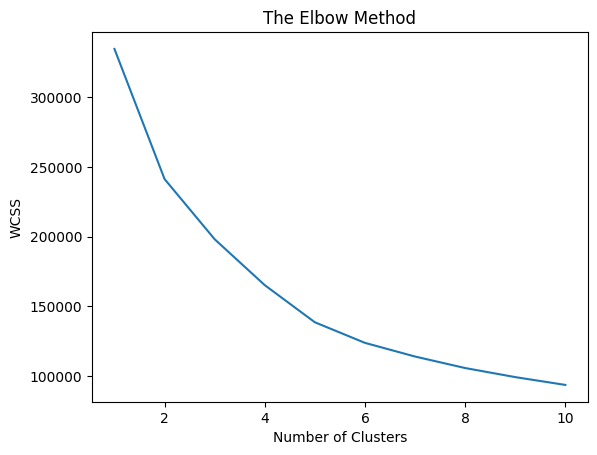

In [129]:
# Elbow method: try different k.
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0, n_init = 10)
    kmeans.fit(df_preprocessed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The graph does not show a completely distinct elbow, but the gradient does get more shallow in the range of 4-6. This estimate will be used in conjunction with the other methods to determine the optimal number of clusters for K-means.

### Silhouette method

Another valuable metric for determining the optimal number of clusters is the silhouette score. This metric provides a quantitative measure of how well each data point fits into its assigned cluster and helps assess the overall quality of the clustering. Silhouette scores range from -1 to 1, with higher scores indicating better-defined clusters. A score close to 1 suggests that data points are well clustered and far from neighbouring clusters, while a score near -1 indicates that data points may have been assigned to the wrong clusters.

In [130]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 2 The average silhouette_score is : 0.25686653557510675
For n_clusters = 3 The average silhouette_score is : 0.24080898444911067
For n_clusters = 4 The average silhouette_score is : 0.24752918459372186
For n_clusters = 5 The average silhouette_score is : 0.26069667966124405
For n_clusters = 6 The average silhouette_score is : 0.24481260176102024


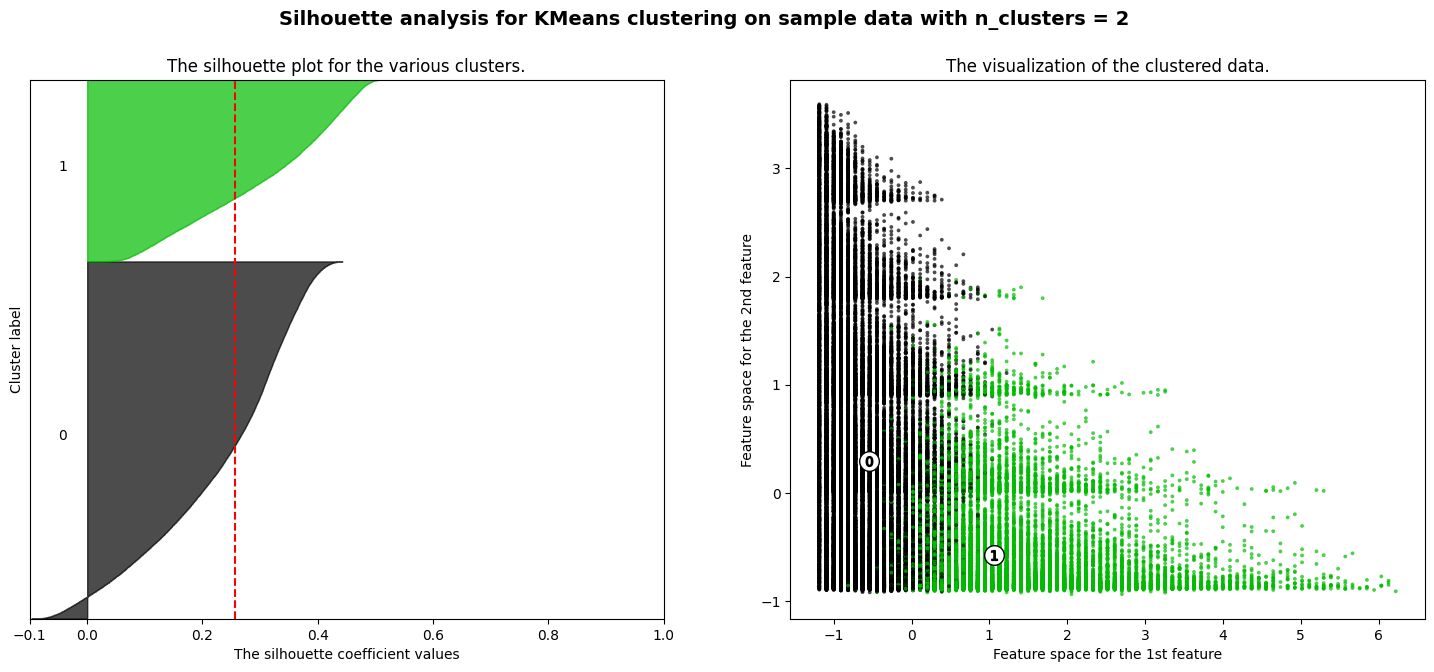

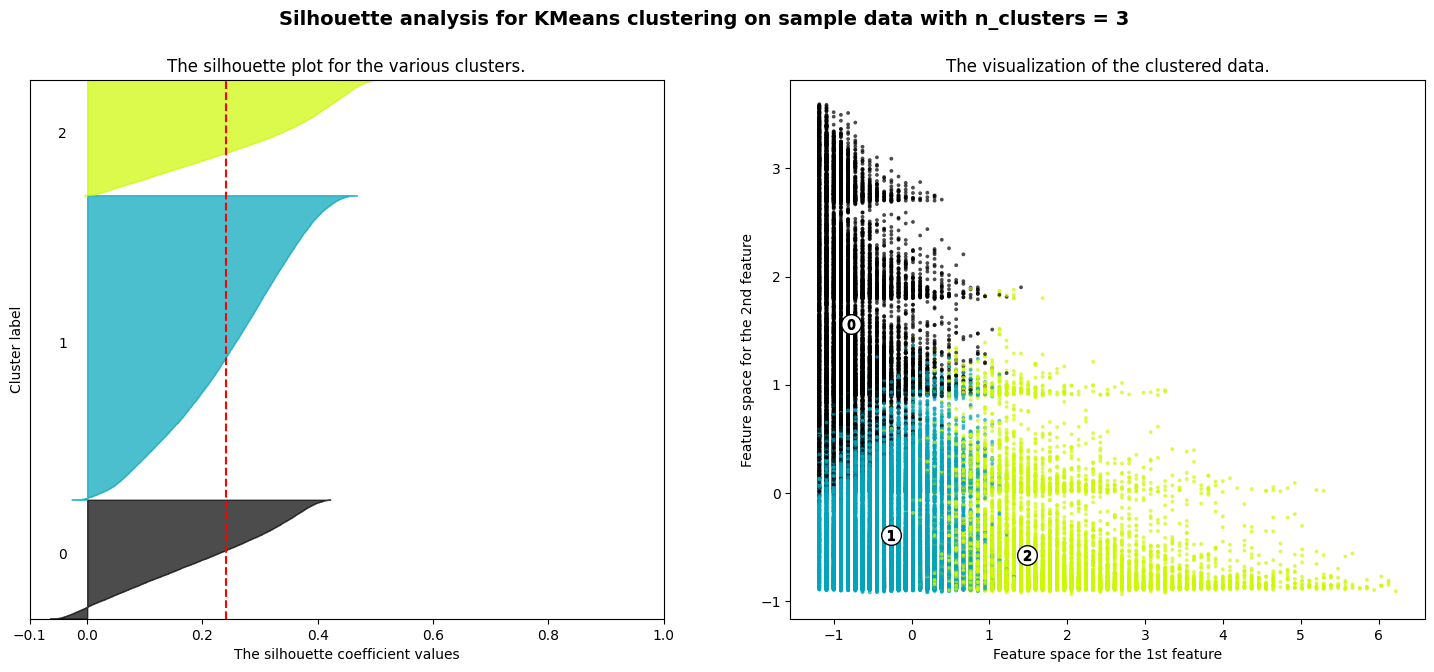

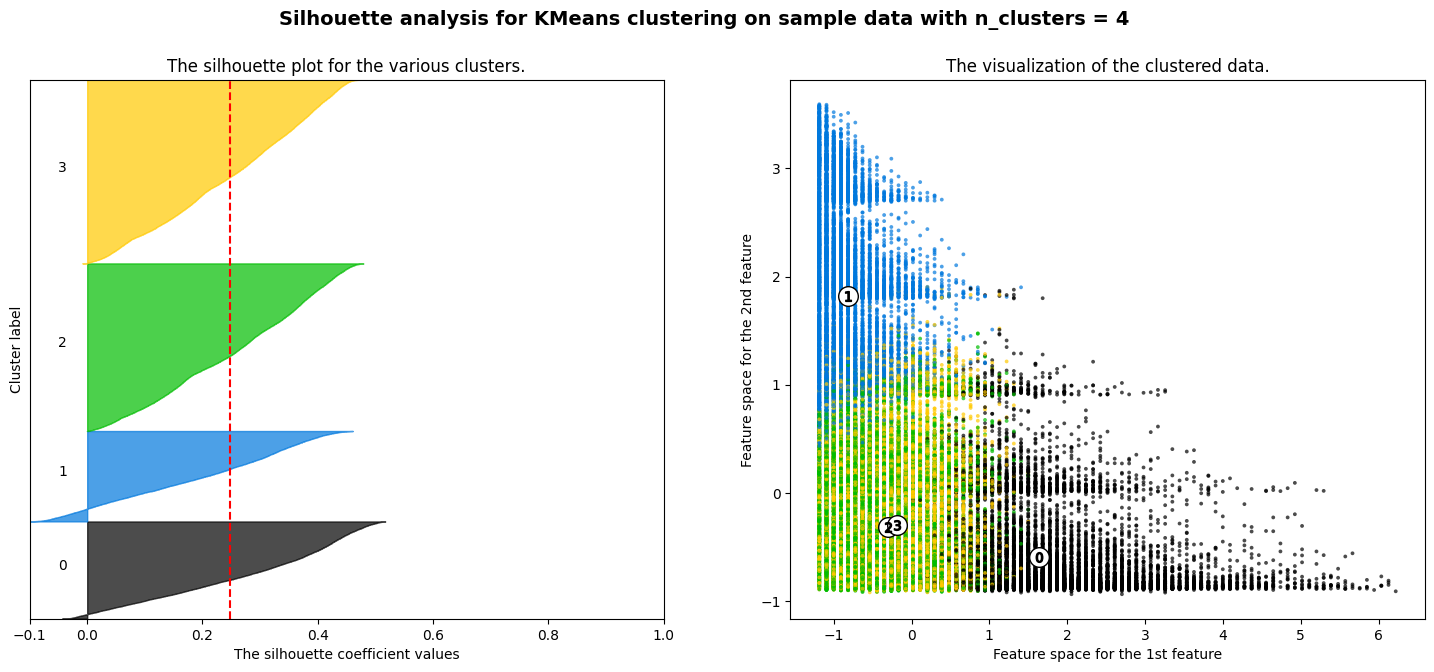

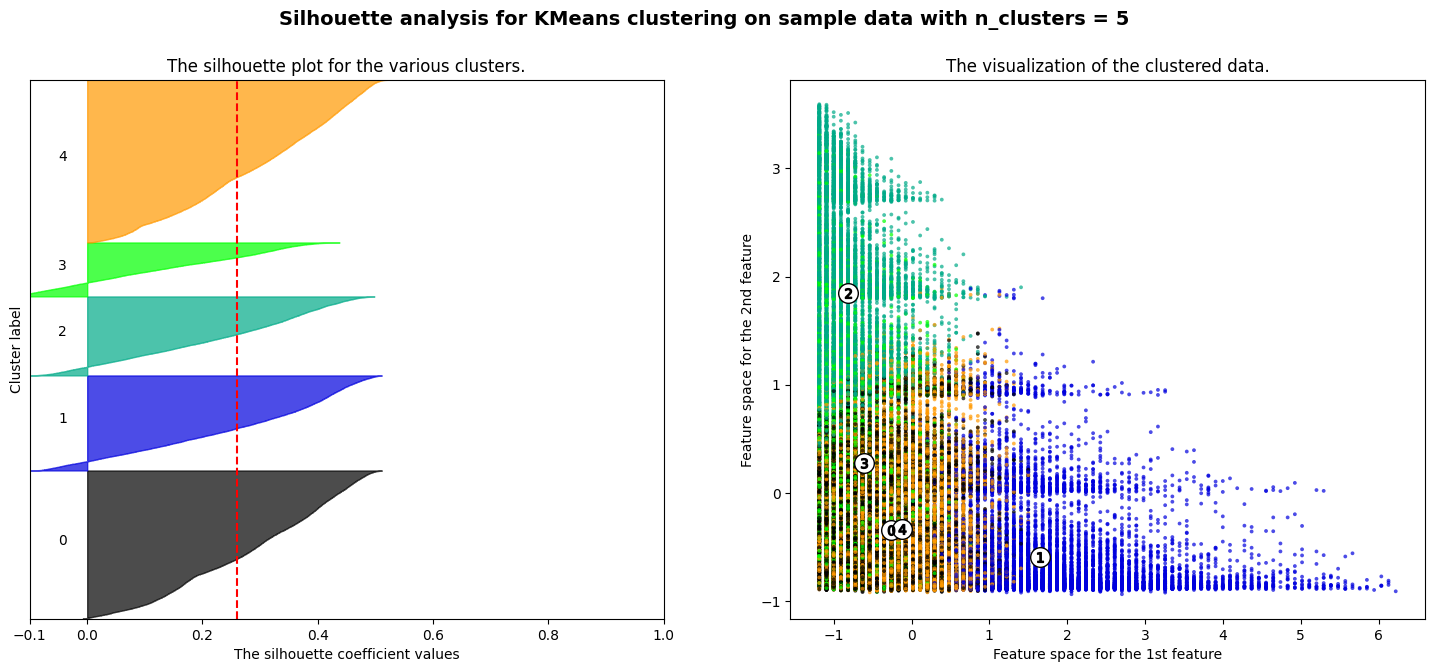

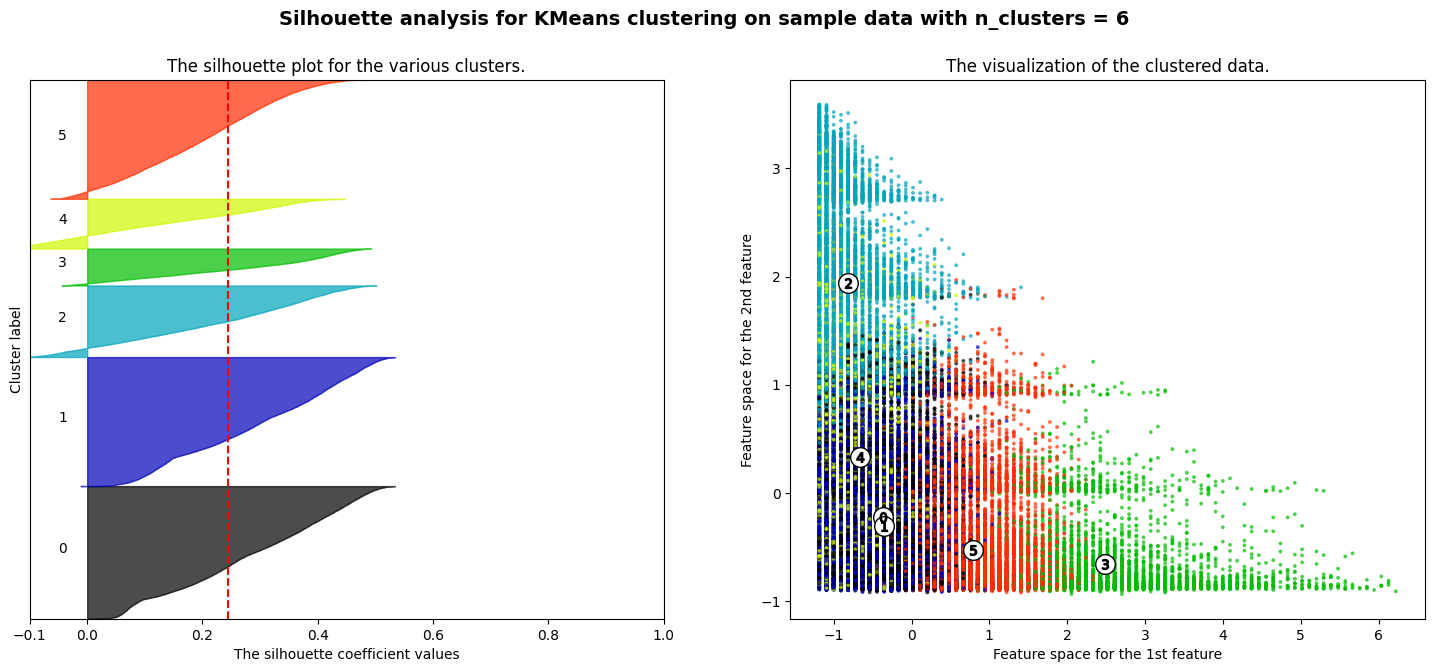

In [131]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns.
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot.
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_preprocessed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init = 10)
    cluster_labels = clusterer.fit_predict(df_preprocessed)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_preprocessed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them.
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle.
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot.
        y_lower = y_upper + 10  # 10 for the 0 samples.

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values.
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks.
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed.
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_preprocessed[:, 0], df_preprocessed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters.
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers.
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Although the coefficients generated are all extremely similar, the number of K with the highest score is 5, which is in line with the result from the Elbow Method.

### Hierarchical clustering

Hierarchical clustering is a method of grouping similar data points into clusters, forming a hierarchical structure. It iteratively combines or divides clusters based on similarity, creating a dendrogram that illustrates the relationships between clusters. The number of clusters isn't predetermined, it's determined by analysing the dendrogram. You can identify a suitable number of clusters by examining the dendrogram for the largest vertical distance between clusters or by choosing a height threshold to cut the tree. 

In [132]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

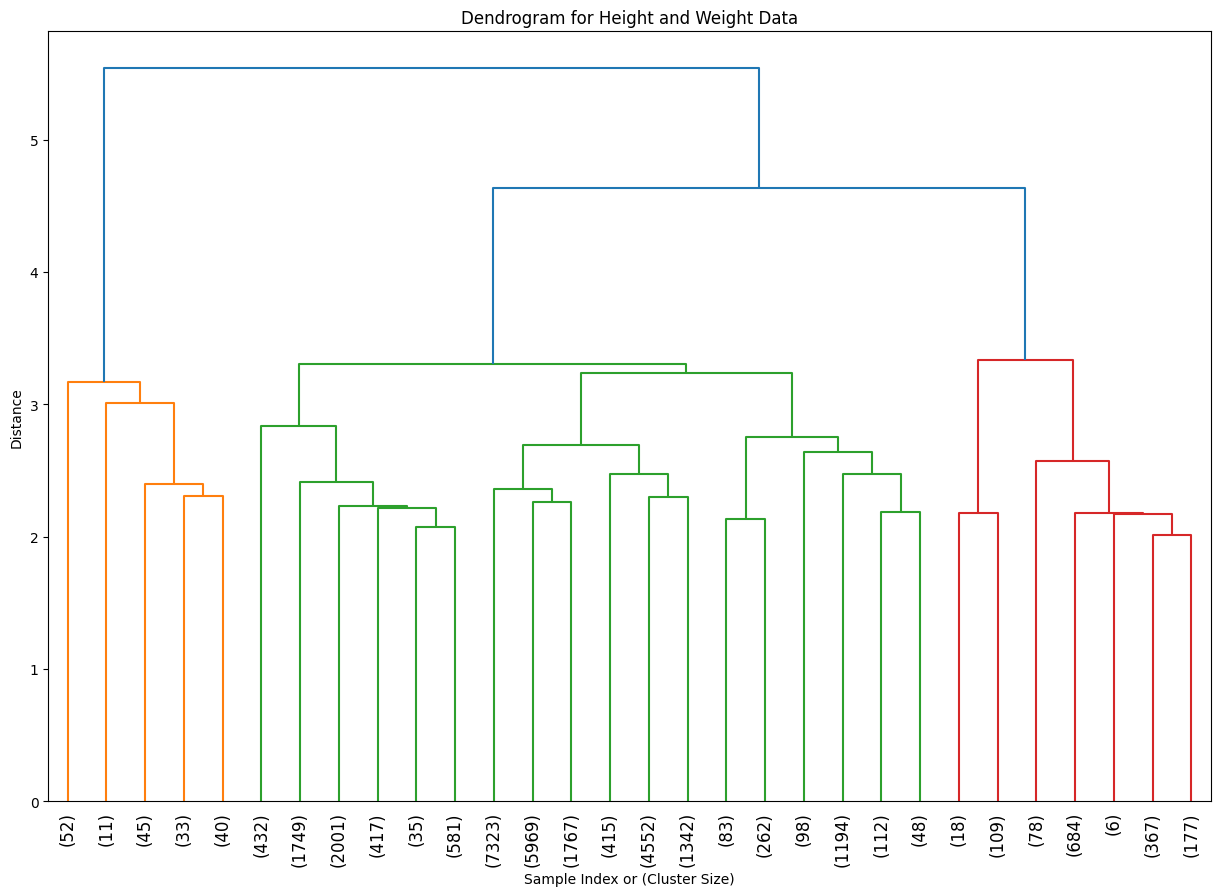

In [133]:
# Creating the linkage matrix and plotting the dendrogram
Z = linkage(df_preprocessed[:30000], method='average') # Not all data points have been used due to computing power constraints

plt.figure(figsize=(15, 10))

dendrogram(Z, truncate_mode="lastp", leaf_rotation=90, leaf_font_size=12)

plt.title('Dendrogram for Height and Weight Data')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

From analysis of the dendrogram is appears that the optimal number of clusters for this data set is 3, which is slightly below that indicated by the other methods but roughly in line. The dendrogram however does provide much clearer evidence of the number of clusters vs the other two methods

### K-means clustering

K-means clustering is a centroid-based unsupervised learning method. It is a relatively simple and popular machine-learning algorithm. The purpose of k-means clustering is to group the data in *k* clusters centred around *k* centroids. These centroids are initially randomly assigned, with data points assigned to clusters based on distance functions, such as Euclidean distance, between the data point and each cluster’s centroid. The centroid is then recalculated for each cluster using the mean of the cluster. 

After analysing the previous methods of determining the optimal number of clusters, three clusters have been chosen for K-means. This is because although the range of the elbow method was 4-6, the silhouette method provided almost uniform coefficients across the whole range and the dendrogram provided the strongest indicator of optimal cluster size of 3.

In [134]:
# Initialize the K-Means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

# Create a pipeline that first preprocesses the data and then applies K-Means
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
 ('clusterer', kmeans)])

# Fit the pipeline to the data
pipeline.fit(df_aggr)

# Get the cluster assignments
cluster_labels = pipeline.predict(df_aggr)
df_aggr["Cluster"] = cluster_labels

### Analysis of clusters

Now that the clusters have been generated by K-means clustering, they can be analysed to determine the characteristics of each cluster. This can help to personalise marketing strategy for different types of customers, or to identify clusters of customers where marketing efforts should be focussed, such as those who typically spend more money.

The characteristics of the different clusters can be visualised using box plots.

In [135]:
def box_plots(df, n_row, n_col):
    """
    Displays a boxplot for each feature in a DataFrame, split by cluster label

    Parameters:
    - df (pd.DataFrame): The dataframe for analysis containing cluster labels
    - n_row (int): Desired number of rows of subplots
    - n_col (int): Desired number of columns of subplots
    """
    # Set subplot number
    plot_num=1

    plt.figure(figsize=(15, 20))

    # Exclude 'Cluster' from columns to plot
    columns_to_plot = [col for col in df.columns if col != 'Cluster']

    # Set color palette for clusters
    unique_clusters = sorted(df['Cluster'].unique())
    palette = sns.color_palette("Set2", len(unique_clusters))

    # Plot a box plot for each variable
    for column in columns_to_plot:
        plt.subplot(n_row, n_col, plot_num)
        sns.boxplot(data=df, x='Cluster', y=column, palette=palette)
        plt.title(column)

        # Change the subplot number for next plot
        plot_num += 1

    # Show the plot
    plt.show()

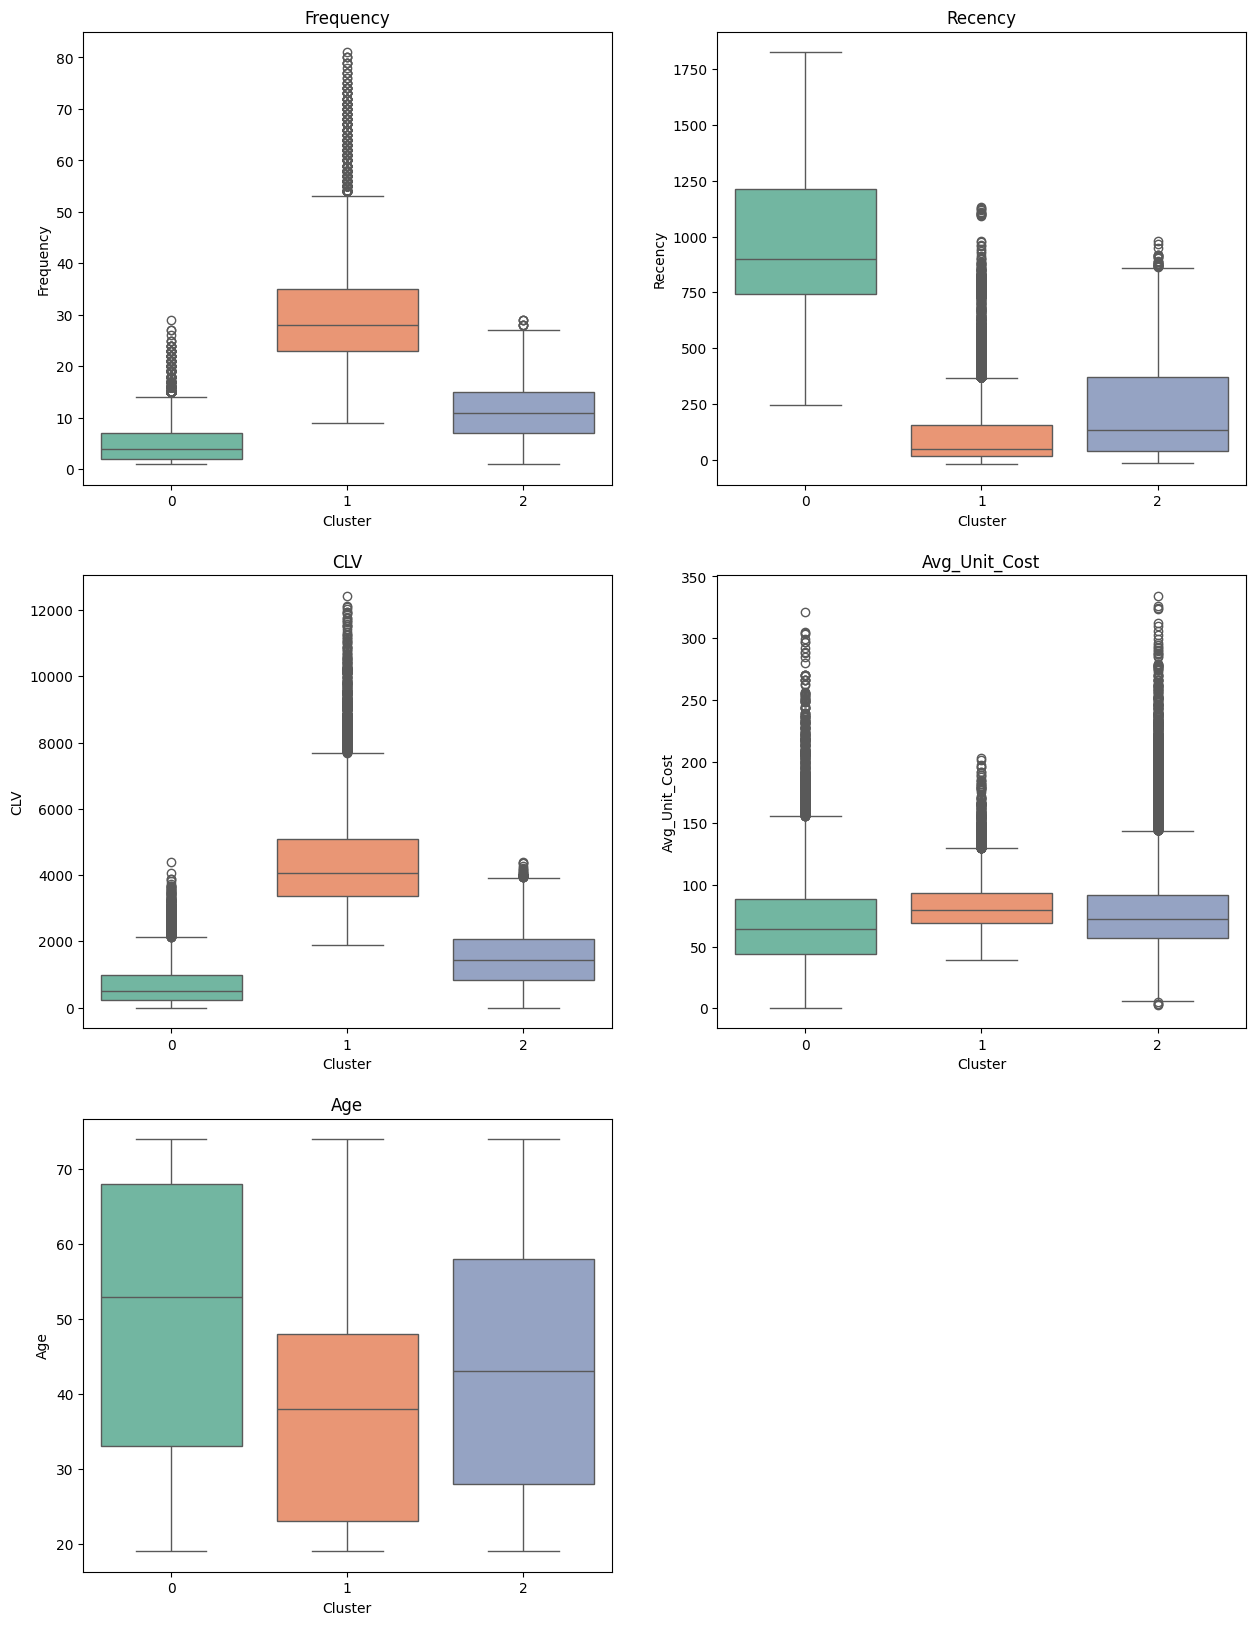

In [136]:
box_plots(df_aggr, n_row=3, n_col=2)

The box plots show us the characteristics of the three clusters and gives us greater insight into their behaviour:
* Cluster 0 - Do not frequently make purchases, have not made purchases in a long time and typically older customers
* Cluster 1 - These customers make the most purchases, spend the most money and have made purchases recently. They are also typically younger
* Cluster 2 - These customers do not frequently make purchases, but have made purchases recently. In terms of age they are in the middle

In [143]:
# Determine the number of customers in each cluster
df_aggr["Cluster"].value_counts()

Cluster
2    37834
0    15137
1    13959
Name: count, dtype: int64

The analysis above shows that there are roughly twice as many customers in cluster 2 vs the other clusters.

---

## Visualisation

Due to the high dimensionality of the data, it is impossible to visualise the clusters that have been generated. We can solve this problem by using dimensionality reduction techniques including Principal Component Analysis (PCA) and t-distributed Stochastic Neighbor Embedding (t-SNE). First, as the features are measured in different units, the data will be scaled to ensure better performance.

In [137]:
# Scale data for better performance
scaler = StandardScaler()
# Drop customer ID from the DataFrame
df_visualise = df_aggr.drop(["Cluster"], axis = 1)
df_scaled = scaler.fit_transform(df_aggr)

### PCA

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms high-dimensional data into a lower-dimensional form while retaining as much variability (information) as possible. This allows us to visualise the clusters generated by K-means

In [138]:
def plot_pca(X, y):
    """
    Transforms high-dimensional data and visualises
    the different clusters after PCA dimensionality reduction.

    Parameters:
    - X: Scaled DataFrame with shape (n_samples, n_features)
    - y: Cluster labels from K-means
    """
    # Apply PCA to reduce the data set to two components
    pca = PCA(n_components=2)
    df_pca = pca.fit_transform(X)

    # Transform into a DataFrame
    df_pca = pd.DataFrame({'PCA 1': df_pca[:, 0], 'PCA 2': df_pca[:, 1]})

    # Label the data based on the different clusters from K-means    
    df_pca["Cluster"] = y

    # Visualise the output
    sns.scatterplot(data=df_pca, x="PCA 1", y="PCA 2", hue="Cluster", palette="tab10")
    plt.show()

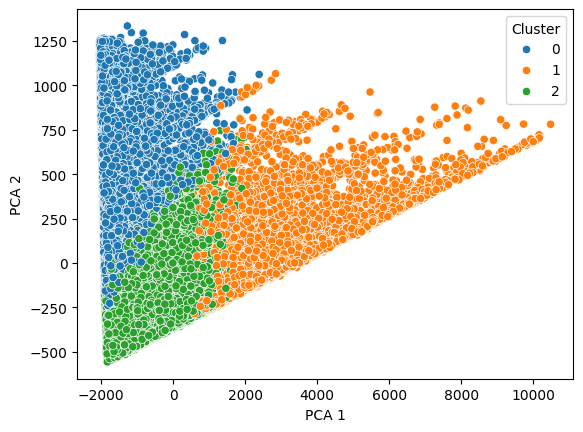

In [139]:
plot_pca(X=df_visualise, y=cluster_labels)

The results of PCA are reasonable and do show somewhat clear groupings of the clusters. However, PCA is not ideal for capturing non-linear relationships in the data.

### t-SNE

t-distributed stochastic neighbour embedding (t-SNE) is another dimensionality reduction tecnhique similar to PCA, however it is better in capturing non-linear relationships between features, which is common for clustering analysis on data sets such as this.

In [140]:
from sklearn.manifold import TSNE

In [141]:
def plot_tsne(X, y):
    """
    Transforms high-dimensional data and visualises
    the different clusters after t-SNE dimensionality reduction.

    Parameters:
    - X: Scaled DataFrame with shape (n_samples, n_features)
    - y: Cluster labels from K-means
    """
    # Transform the data with t-SNE.
    TSNE_model = TSNE(n_components=2, perplexity=30.0)
    TSNE_transformed_data = TSNE_model.fit_transform(X)

    # Transform into a DataFrame
    df_tsne = pd.DataFrame({'Component 1': TSNE_transformed_data[:, 0], 'Component 2': TSNE_transformed_data[:, 1]})

    # Label the data based on the different clusters from K-means
    df_tsne["Cluster"] = y
    # Visualise the output.
    sns.scatterplot(data=df_tsne, x="Component 1", y="Component 2", hue="Cluster", palette="tab10")
    plt.show()

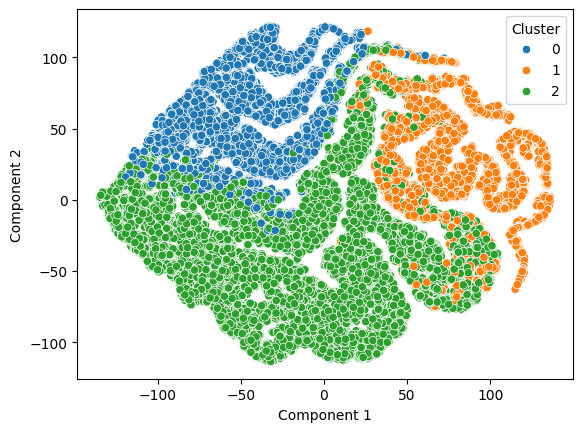

In [142]:
plot_tsne(X=df_visualise, y=cluster_labels)

The t-SNE results show a much clearer segmentation of the clusters.

---

## Conclusions

After analysis by the Elbow Method, Silhouette Score and Hierarchical Clustering, three clusters was chosen as the optimal number of clusters for use in K-means. The clusters can be characterised as below:
* Cluster 0 - Do not frequently make purchases, have not made purchases in a long time and typically older customers
* Cluster 1 - These customers make the most purchases, spend the most money and have made purchases recently. They are also typically younger
* Cluster 2 - These customers do not frequently make purchases, but have made purchases recently. In terms of age they are in the middle

Cluster two also represents well over 50% of the customers. Based on this information, marketing efforts should be focussed on Clusters 1 and 2, with extra focus on Cluster 2. Customers in Cluster 1 are regular customers that are already making lots of purchases and extra marketing could increase their spending. For Cluster 2, these are customers that have made recent purchases but do not make purchases often. Extra marketing for these customers could help to increase the frequency of their spending and avoid them becoming infrequent customers such as Cluster 1. Customers in Cluster 1 have not made many purchases, and have not made any recently suggesting marketing efforts would be better targeted elsewhere.